<center> CA1: Pacman</center>
Name : sajjad pakdaman savoji <br>
SID  : 810195517

# Modeling
1. State : any unique configuration of agent's position and fruits status
exp: p position (2 , 1) , q position (3 , 4) , fruit_position = ($x_i$ ,$y_i$)

2. Goal State : goal is reached due to complete removal of fruits

3. Actions : Each possible move for both agents(P and Q) is considered a valid move thus thus the branchig factor of graph would be at most 8 (4 brach each agent corispond to UP,DOWN , LEFT , RIGHT)

4. Neighborhood : Two node are neighbor if and only if transportation is possible by only ONE action

5. Action Cost : The cost of each peer action is considered 1
    

In [1]:
from ca1 import *

# BFS
Complition and Optimality of BFS algorithem stands on the basis that by expanding(visiting) shallowest node , min path cost is achieved

visited nodes are held in a python dictionary named "met" with dramatically d

In [ ]:
def BFS(init_state):
    met = {}
    Q = []
    Q.append(init_state)
    met.update({init_state:1})
    while len(Q):
        frontier = Q.pop(0)
        if frontier.is_goal() :
            return frontier , len(met)
        childs = frontier.expand()
        for child in childs : 
            if child not in met:
                Q.append(child)
                met.update({child:1})
    return None , len(met)

# IDS
1. There are two common ways to traverse a graph, BFS and DFS. Considering a Tree (or Graph) of huge height and width, both BFS and DFS are not very efficient due to following reasons.
<br>

2. IDDFS combines depth-first search’s space-efficiency and breadth-first search’s fast search (for nodes closer to root).
<br>

3. IDDFS calls DFS for different depths starting from an initial value. In every call, DFS is restricted from going beyond given depth. So basically we do DFS in a BFS fashion
<br>

4. An important thing to note is, we visit top level nodes multiple times. The last (or max depth) level is visited once, second last level is visited twice, and so on. It may seem expensive, but it turns out to be not so costly, since in a tree most of the nodes are in the bottom level. So it does not matter much if the upper levels are visited multiple times. 

## DFS
code for Depth First Search

In [ ]:
def DFS(Q , met , depth):
    deep = []
    while len(Q):
        frontier = Q.pop(-1)
        if frontier.is_goal() : 
            return frontier , met , deep
        if frontier.cost == depth :
            deep.append(frontier)
            continue
        childs = frontier.expand()
        for child in childs : 
            if child not in met:
                Q.append(child)
                met.update({child:1})
    return None , met , deep

## IDDFS
code for Iterative Deepening Search

In [ ]:
def IDS(init_state):
    depth = 0
    met = {init_state :1}
    deep = [init_state]
    while(True):
        node , met , _ = DFS(deep , met , depth)
        if node is not None : 
            return node , len(met)
        depth += 1

# A* Search
1. A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.
2. What A* Search Algorithm does is that at each step it picks the node according to a value-‘f’ which is a parameter equal to the sum of two other parameters – ‘g’ and ‘h’. At each step it picks the node/cell having the lowest ‘f’, and process that node/cell.
$$
f(n) = g(n) + h(n)
$$

## Heuristic Function
Some partially consistent huristic functions was considered for this problem and effectiveness of each function is illustrated in following stats. The list include:
1. Longest distance :
    In this huristic function our estimation equals the further fruit eatable for each peer agent.<br><br>
    Admisibility : the aget should at least eat that fruit
<br>
<br>
2. Number of Fruits : 
    In this huristic function our estimation equals the number of fruits left in the map :))<br><br>
    Admisibility : all the fruits should be eaten so at least should jump to the fruits position
<br>
<br>
3. Mean of Manhatan Dis:
    In this huristic function our estimation equals the mean of Distances of all fruits to each peer agent<br><br>
    Admisibility : mean of distances are less than longest distance which is admissible.

code for A* search

In [ ]:
met = {}
    pending = {}
    Q = []
    # heapq.heappush(Q , init_state)
    Q.append(init_state)
    pending.update({init_state:1})
    while len(Q):
        # frontier = heapq.heappop(Q)
        frontier = Q.pop(Q.index(min(Q)))
        pending.pop(frontier)
        met.update({frontier:1})
        if frontier.is_goal() :
            return frontier , len(met)
        childs = frontier.expand()
        for child in childs : 
            if child not in met:
                if child not in pending:
                    Q.append(child)
                    pending.update({child : 1})
                else :
                    if child < Q[Q.index(child)]:
                        Q[Q.index(child)] = child
    return None , len(met)

<h2>Comparison Table</h2>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<center><h3>test1</h3></center>
<table>
  <tr>
    <th>.......</th>
    <th>goal cost</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
  <tr>
    <th>BFS</th>
    <th>33</th>
    <th>33</th>
    <th>155023</th>
    <th>102.88</th>
  </tr>
  <tr>
    <th>IDS</th>
    <th>goal cost</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
  <tr>
    <th>A* search</th>
    <th>goal cost</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
</table>

<center><h3>test2</h3></center>
<table>
  <tr>
    <th>.......</th>
    <th>goal optimal cost</th>
    <th>goal cost</th>
    <th>states visiited</th>
    <th>time</th>
  </tr>
  <tr>
    <th>BFS</th>
    <th>17</th>
    <th>17</th>
    <th>3808</th>
    <th>2.11</th>
  </tr>
  <tr>
    <th>IDS</th>
    <th>17</th>
    <th>22</th>
    <th>1296</th>
    <th>4.97</th>
  </tr>
  <tr>
    <th>A* search</th>
    <th>17</th>
    <th>17</th>
    <th>3948</th>
    <th>27.19</th>
  </tr>
</table>

<center><h3>test3</h3></center>
<table>
  <tr>
    <th>.......</th>
    <th>goal cost</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
  <tr>
    <th>BFS</th>
    <th>20</th>
    <th>20</th>
    <th>3046</th>
    <th>1.63</th>
  </tr>
  <tr>
    <th>IDS</th>
    <th>20</th>
    <th>34</th>
    <th>387</th>
    <th>11.39</th>
  </tr>
  <tr>
    <th>A* search</th>
    <th>20</th>
    <th>20</th>
    <th>2912</th>
    <th>10.25</th>
  </tr>
</table>

<center><h3>test4</h3></center>
<table>
  <tr>
    <th>.......</th>
    <th>goal cost</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
  <tr>
    <th>BFS</th>
    <th>17</th>
    <th>17</th>
    <th>13533</th>
    <th>6.97</th>
  </tr>
  <tr>
    <th>IDS</th>
    <th>17</th>
    <th>18</th>
    <th>518</th>
    <th>4.86</th>
  </tr>
  <tr>
    <th>A* search</th>
    <th>17</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
</table>

<center><h3>test5</h3></center>
<table>
  <tr>
    <th>.......</th>
    <th>goal cost</th>
    <th>states visited</th>
    <th>states visiited uniquely</th>
    <th>time</th>
  </tr>
  <tr>
    <th>BFS</th>
    <th>13</th>
    <th>13</th>
    <th>524</th>
    <th>0.18</th>
  </tr>
  <tr>
    <th>IDS</th>
    <th>13</th>
    <th>26</th>
    <th>140</th>
    <th>1.27</th>
  </tr>
  <tr>
    <th>A* search</th>
    <th>13</th>
    <th>13</th>
    <th>477</th>
    <th>0.74</th>
  </tr>
</table>


</body>
</html>


# Time Plots 

In [2]:
import matplotlib.pyplot as plt
cost = [13 , 17 , 17 , 20 , 33]
BFS_time = [0.18 , 2.11 , 6.97 , 1.63  ,102.88]
ids_time = [1.27 , 4.97 , 4.86, 11.39 , 0]
as_time = [0.74 , 27.19 , 0 , 10.25 , 0]

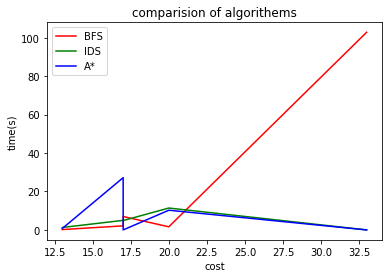

In [9]:
plt.plot(cost , BFS_time , label = 'BFS' , color = 'red')
plt.plot(cost , ids_time , label = 'IDS' , color = 'green')
plt.plot(cost , as_time  , label = 'A*' , color = 'blue')
plt.legend()
plt.title('comparision of algorithems')
plt.xlabel('cost')
plt.ylabel('time(s)')
plt.show()
